In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
file_path = '/content/drive/MyDrive/Colab_Notebooks/project/anonymized_hubspot_companies.csv'
df = pd.read_csv(file_path, low_memory=False)

In [4]:
print(df.shape)

# Missing Values Detection
missing_percentage = df.isnull().mean() * 100
print("\nPercentage of missing values in each column:")
print(missing_percentage)

(19851, 46)

Percentage of missing values in each column:
Parent Company                   99.843837
CCaaS                            89.491713
Annual Revenue                    7.606670
Target Account                   99.833762
Associated Contact               10.372273
Number of Form Submissions       13.112690
Total Agents                    100.000000
Web Technologies                  6.266687
Close Date                       99.642335
# of Agents Total                99.788424
Number of times contacted        41.846758
Contact with Primary Company     13.112690
ICP Fit Level                    69.860460
Revenue range                   100.000000
# of Agents Contracted           99.798499
Record ID                         0.000000
Time Zone                         5.662183
Primary Industry                 44.345373
Number of Pageviews              13.112690
Primary Company                 100.000000
Year Founded                     10.085134
ICP                              91.708

In [5]:
# Drop Columns with >80% Missing Values

threshold = 80
df = df.loc[:, missing_percentage < threshold]

print("\nDataframe shape after dropping columns with >80% missing values:")
print(df.shape)


Dataframe shape after dropping columns with >80% missing values:
(19851, 22)


In [6]:
# Outlier Detection

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumeric columns:", numeric_cols)

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers have been capped using the IQR method.")
print(df.shape)
print(df.columns)


Numeric columns: ['Annual Revenue', 'Number of Form Submissions', 'Number of times contacted', 'Record ID', 'Number of Pageviews', 'Year Founded', 'Number of Employees', 'Number of Sessions']
Outliers have been capped using the IQR method.
(19851, 22)
Index(['Annual Revenue', 'Associated Contact', 'Number of Form Submissions',
       'Web Technologies', 'Number of times contacted',
       'Contact with Primary Company', 'ICP Fit Level', 'Record ID',
       'Time Zone', 'Primary Industry', 'Number of Pageviews', 'Year Founded',
       'State/Region', 'Consolidated Industry', 'Number of Employees',
       'Primary Sub-Industry', 'Number of Sessions', 'Country/Region',
       'Industry', 'Create Date', 'Company name', 'Last Modified Date'],
      dtype='object')


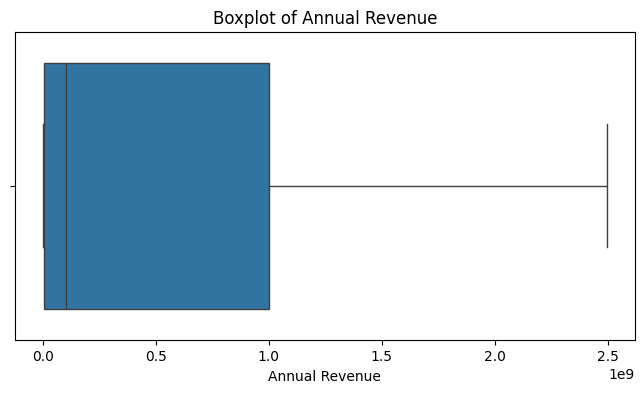

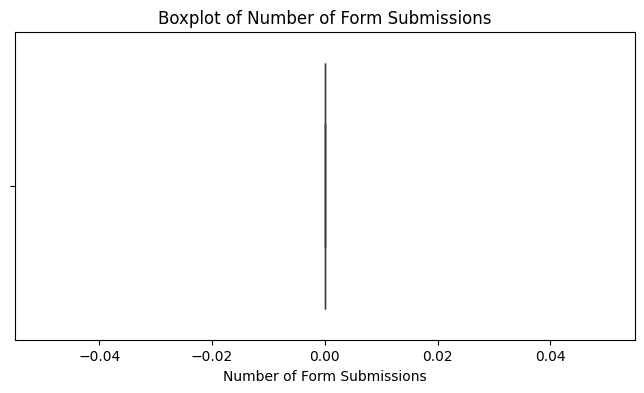

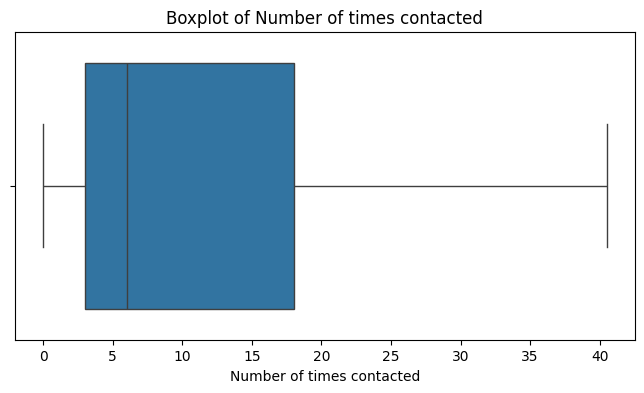

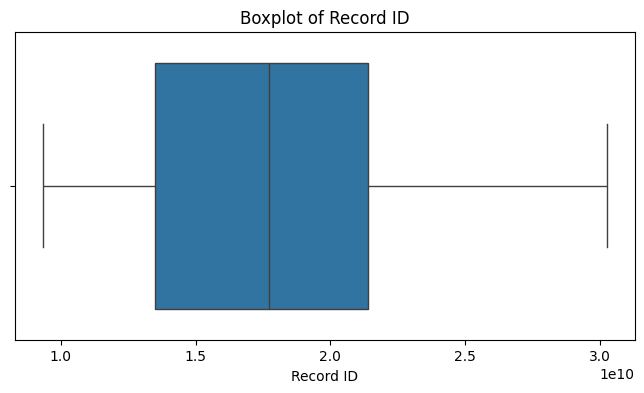

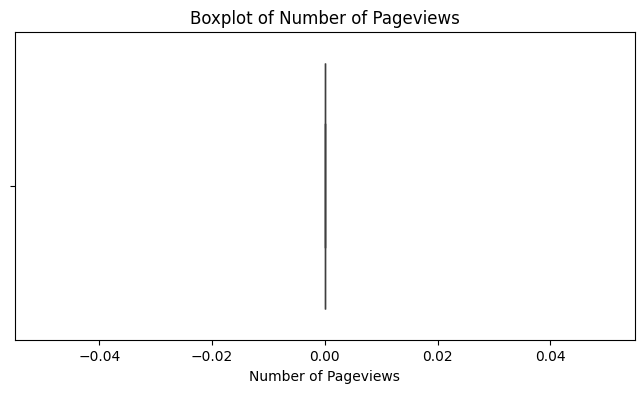

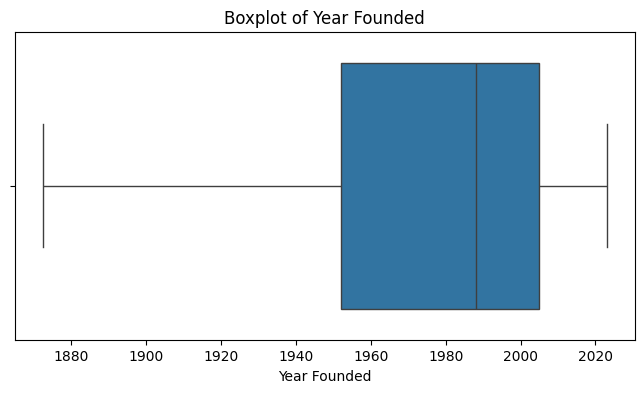

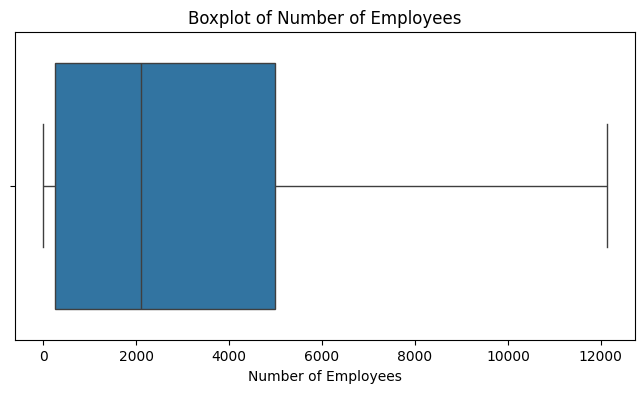

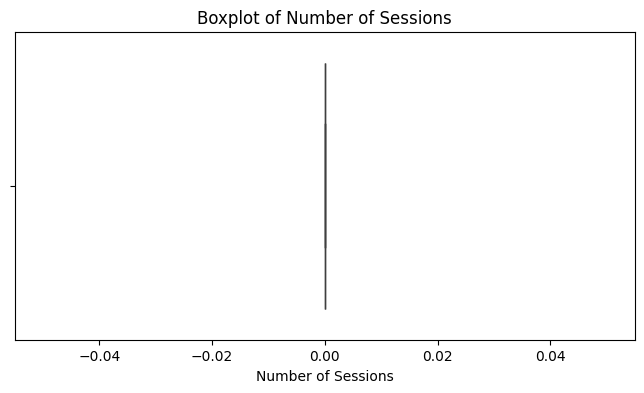

In [7]:
# Data visualizations
# box plots

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

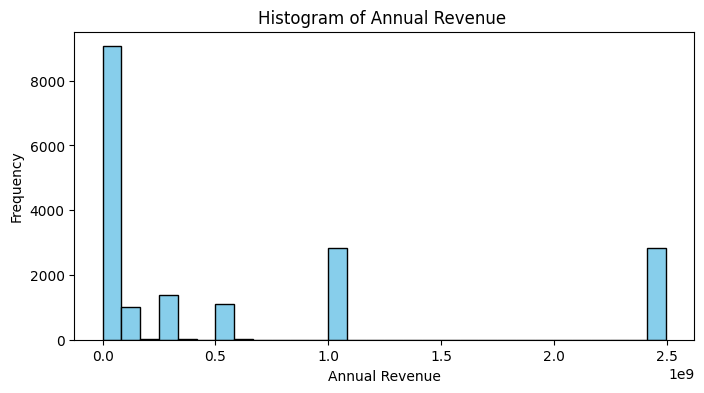

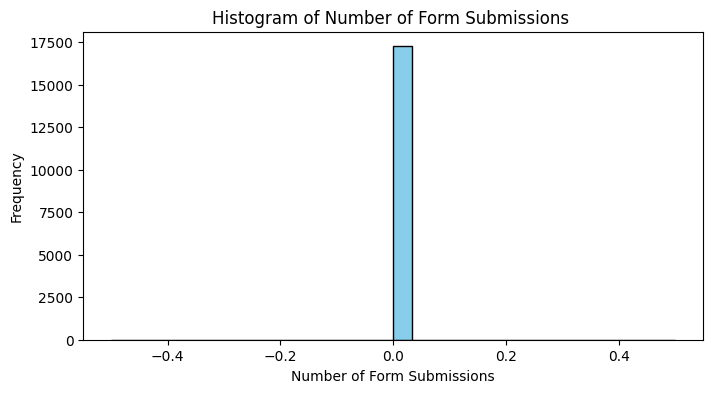

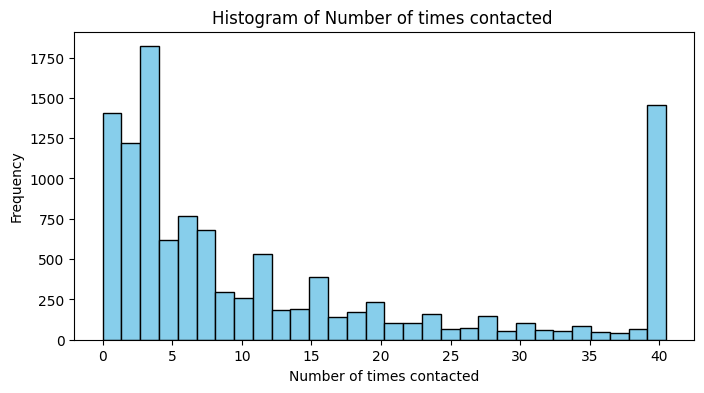

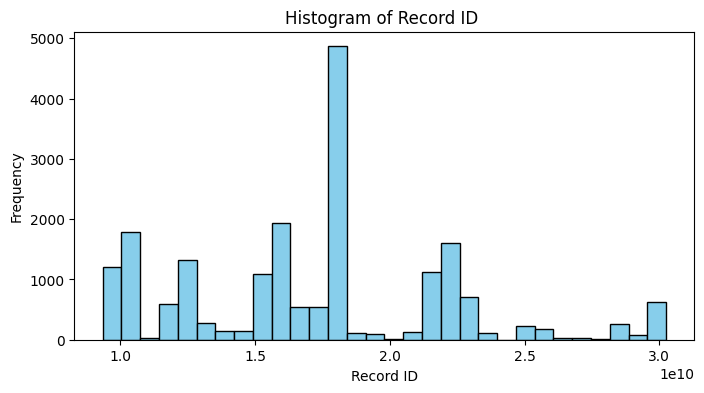

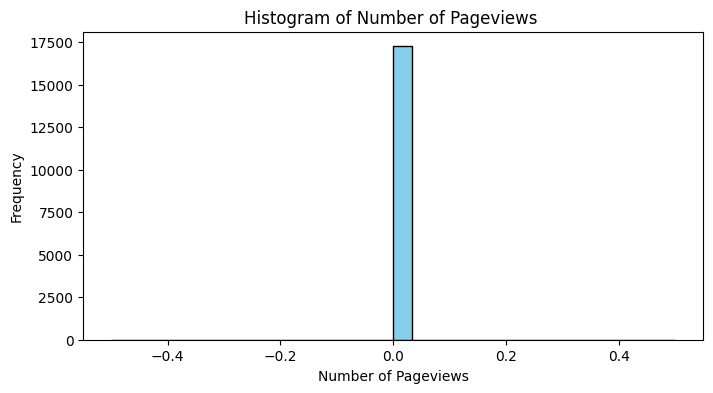

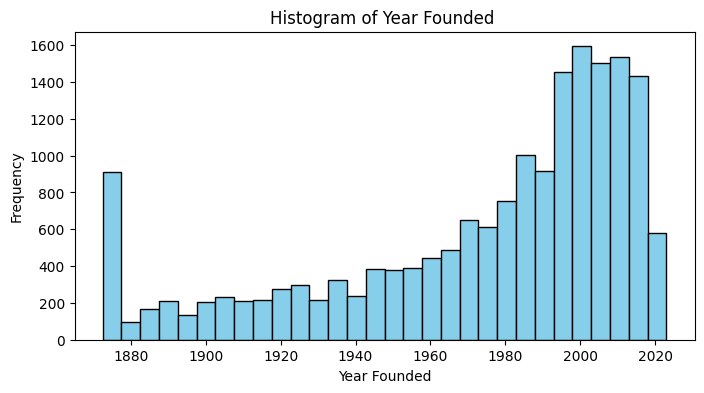

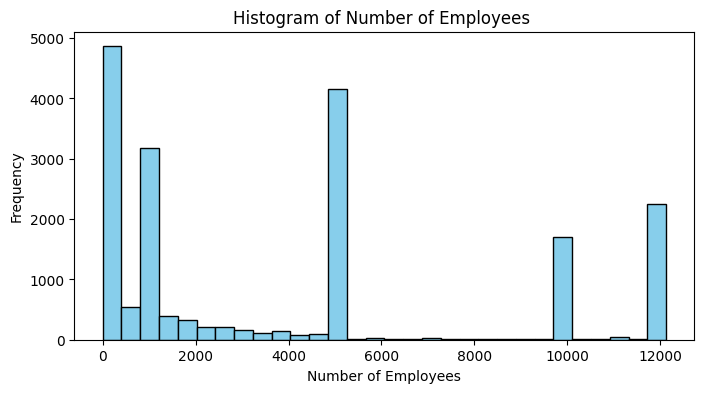

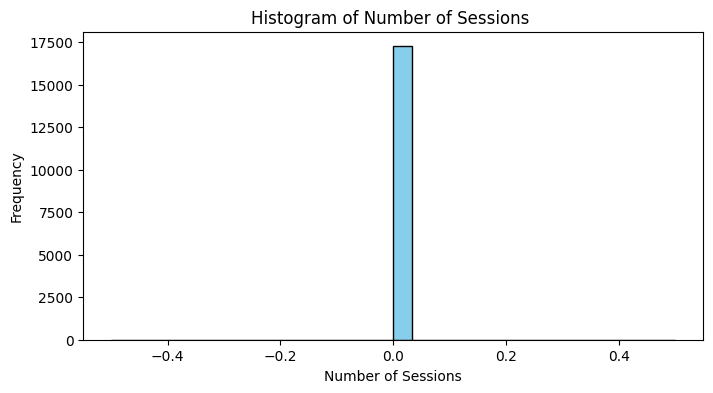

In [8]:
# histograms

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col} ')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

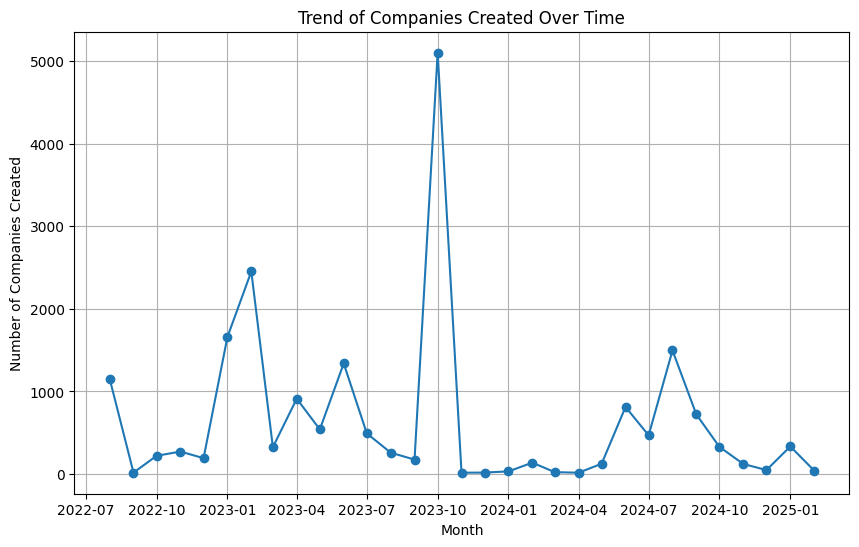

In [9]:
df['Create Date'] = pd.to_datetime(df['Create Date'], errors='coerce')
df['Last Modified Date'] = pd.to_datetime(df['Last Modified Date'], errors='coerce')

df['Create_Month'] = df['Create Date'].dt.to_period('M')

# time-series trends: Count the number of companies created per month
company_count = df.groupby('Create_Month').size()
company_count.index = company_count.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(company_count.index, company_count.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Companies Created")
plt.title("Trend of Companies Created Over Time")
plt.grid(True)
plt.show()

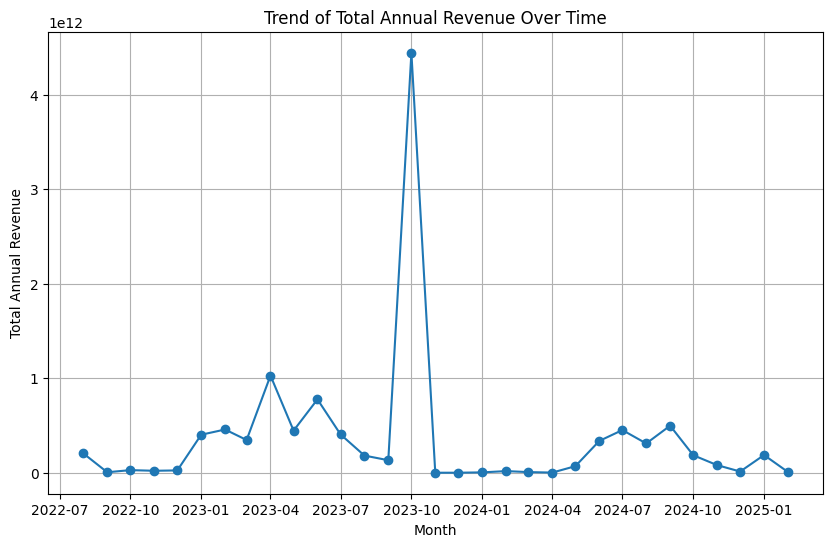

In [12]:
#  time-series trends: Aggregate 'Annual Revenue' by month
df['Annual Revenue'] = pd.to_numeric(df['Annual Revenue'], errors='coerce')

# Sum the annual revenue for each month
revenue_monthly = df.groupby('Create_Month')['Annual Revenue'].sum()
revenue_monthly.index = revenue_monthly.index.to_timestamp()

plt.figure(figsize=(10, 6))
plt.plot(revenue_monthly.index, revenue_monthly.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Total Annual Revenue")
plt.title("Trend of Total Annual Revenue Over Time")
plt.grid(True)
plt.show()

In [13]:
# Summary Statistics (mean, median, standard deviation)
numeric_stats = df[numeric_cols].describe().T
median_stats = df[numeric_cols].median()
numeric_stats['median'] = median_stats

print("\nSummary Statistics (Mean, Median, Standard Deviation) for Numeric Columns:")
print(numeric_stats[['mean', 'median', 'std']])


Summary Statistics (Mean, Median, Standard Deviation) for Numeric Columns:
                                    mean        median           std
Annual Revenue              6.055530e+08  1.000000e+08  8.802098e+08
Number of Form Submissions  0.000000e+00  0.000000e+00  0.000000e+00
Number of times contacted   1.271643e+01  6.000000e+00  1.340946e+01
Record ID                   1.721258e+10  1.773398e+10  4.943008e+09
Number of Pageviews         0.000000e+00  0.000000e+00  0.000000e+00
Year Founded                1.973370e+03  1.988000e+03  4.120499e+01
Number of Employees         4.055750e+03  2.100000e+03  4.227013e+03
Number of Sessions          0.000000e+00  0.000000e+00  0.000000e+00



Top 10 class distribution with percentages for categorical features:

Column: Associated Contact
Associated Contact
Contact_71a916e7    0.016862
Contact_948fa4eb    0.016862
Contact_a2a88d75    0.011241
Contact_e6831e35    0.011241
Contact_7840134e    0.011241
Contact_0838dde4    0.011241
Contact_de7b1a4b    0.011241
Contact_ee33874b    0.011241
Contact_5acdeb1a    0.011241
Contact_c41f05b8    0.011241
Name: proportion, dtype: float64


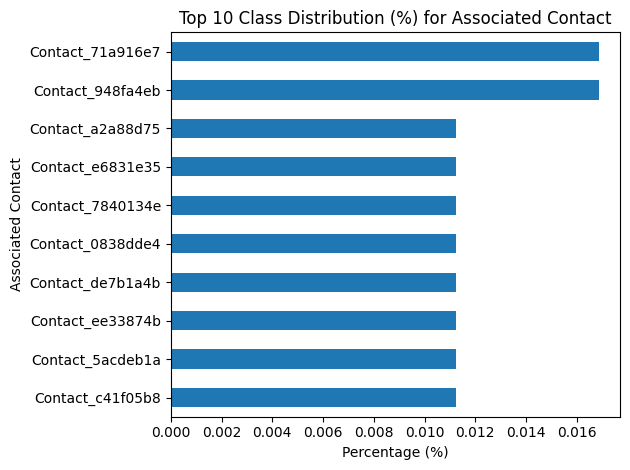


Column: Web Technologies
Web Technologies
Microsoft Exchange Online; Microsoft Office 365; Godaddy Nameserver; Outlook    0.295588
Microsoft Exchange Online; Salesforce; Microsoft Office 365; Outlook            0.268716
Microsoft Exchange Online; Microsoft Office 365; Outlook                        0.252593
Salesforce                                                                      0.220347
Google Apps                                                                     0.214973
Google Tag Manager                                                              0.171978
Google Analytics                                                                0.166604
Microsoft Exchange Online; Outlook                                              0.161230
Microsoft Exchange Online; Salesforce; Outlook                                  0.155855
Godaddy Nameserver; Google Apps                                                 0.145107
Name: proportion, dtype: float64


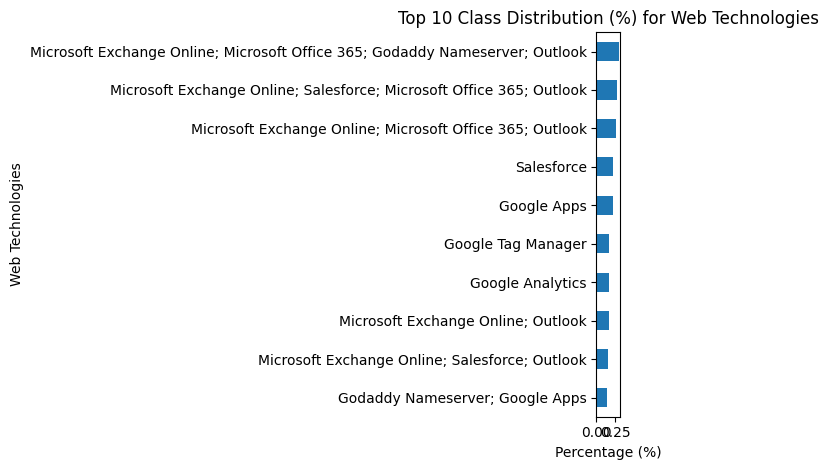


Column: Contact with Primary Company
Contact with Primary Company
Company_7cdebdc1    0.011596
Company_576068e6    0.011596
Company_98422fde    0.005798
Company_4eea30f2    0.005798
Company_2453efb3    0.005798
Company_637c32a8    0.005798
Company_2cfa7562    0.005798
Company_4375cd8e    0.005798
Company_48fdaa35    0.005798
Company_d66a8a88    0.005798
Name: proportion, dtype: float64


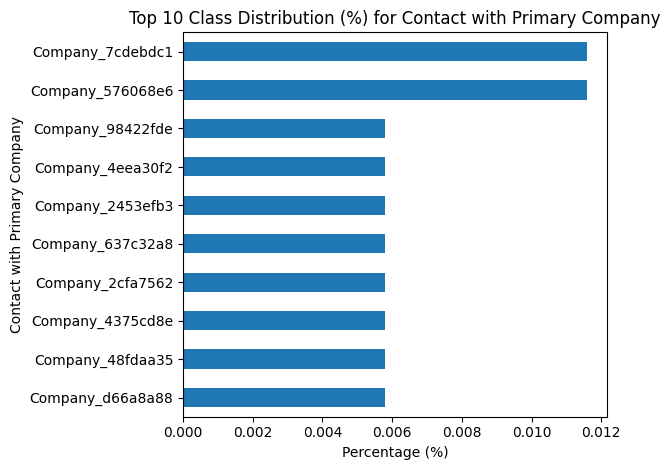


Column: ICP Fit Level
ICP Fit Level
Tier 2: Partial Fit    34.681598
Tier 3: Long Tail      34.364031
Tier 1: Ideal Fit      30.954371
Name: proportion, dtype: float64


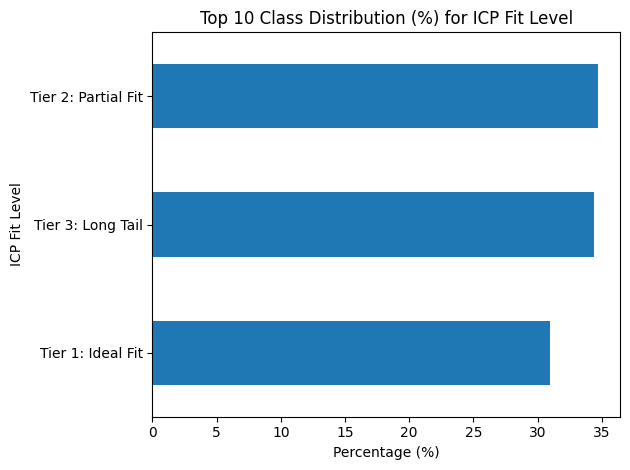


Column: Time Zone
Time Zone
America/New_York       35.205853
America/Chicago        20.222139
America/Los_Angeles    13.579324
America/Denver          3.219950
Europe/London           2.515085
America/Toronto         2.280130
Asia/Kolkata            2.146633
America/Detroit         1.724782
America/Phoenix         1.436429
Europe/Berlin           0.998558
Name: proportion, dtype: float64


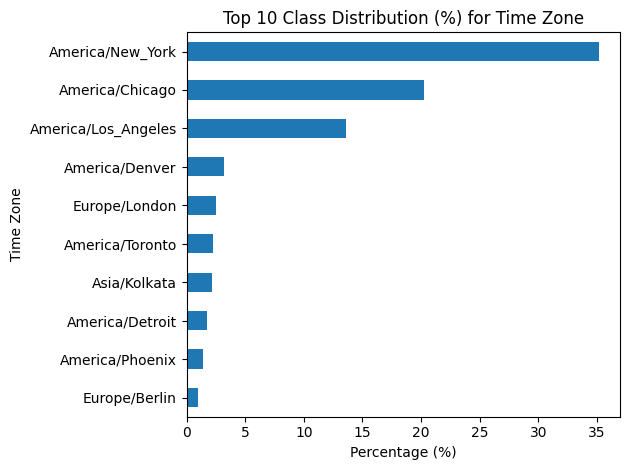


Column: Primary Industry
Primary Industry
Manufacturing                     17.089066
Business Services                 12.979725
Finance                            9.377263
Software                           8.046705
Education                          6.743302
Retail                             6.154960
Hospitals & Physicians Clinics     4.471398
Insurance                          4.353729
Transportation                     4.299421
Hospitality                        4.163650
Name: proportion, dtype: float64


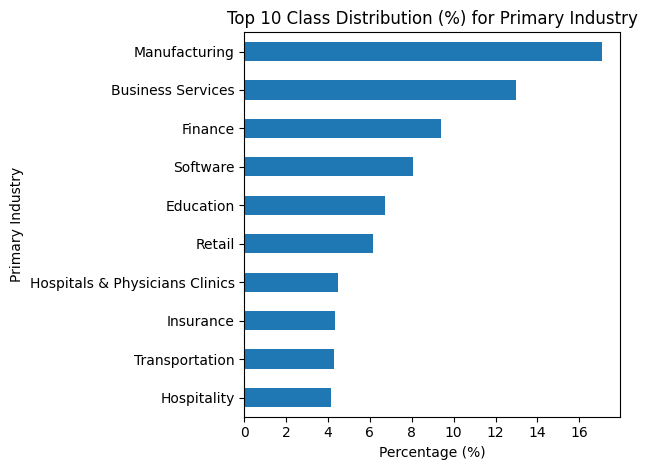


Column: State/Region
State/Region
California    6.154422
CA            4.512886
Texas         4.122554
New York      3.812426
Florida       2.924821
Illinois      2.598653
TX            2.577264
NY            2.454283
Ontario       2.427548
FL            2.358037
Name: proportion, dtype: float64


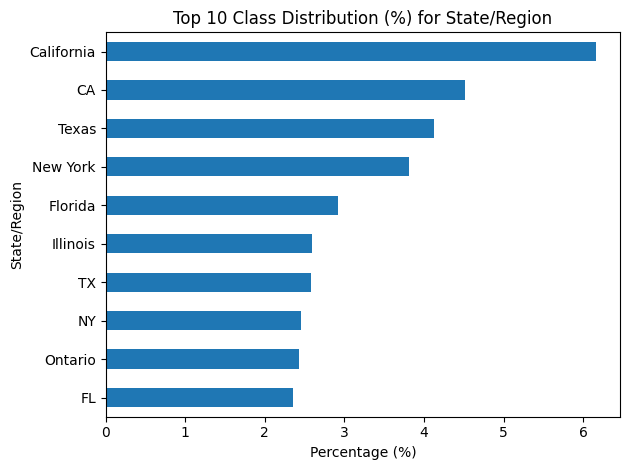


Column: Consolidated Industry
Consolidated Industry
(No value)                  10.432416
Healthcare                  10.170346
Banking                      9.686524
Technology                   9.590767
Consumer Goods               7.101099
BPO                          6.299768
Communications and Media     5.926822
Education                    5.458119
Insurance                    4.989416
Retail                       4.646709
Name: proportion, dtype: float64


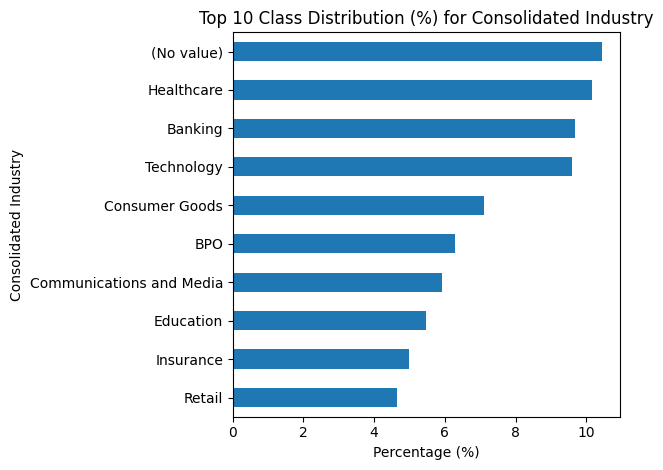


Column: Primary Sub-Industry
Primary Sub-Industry
Banking                             6.181334
Colleges & Universities             5.770725
Custom Software & IT Services       4.250361
Medical & Surgical Hospitals        3.040728
Industrial Machinery & Equipment    2.918655
Freight & Logistics Services        2.619021
Management Consulting               2.330485
Food & Beverage                     2.152924
Electricity, Oil & Gas              2.064144
Building Materials                  1.975363
Name: proportion, dtype: float64


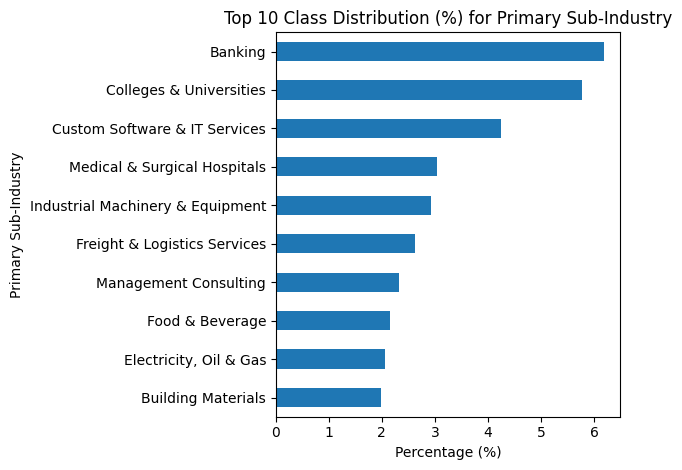


Column: Country/Region
Country/Region
United States     77.048319
Canada             4.868697
United Kingdom     2.468487
India              2.006303
Australia          1.186975
Germany            1.092437
France             0.997899
Japan              0.850840
Switzerland        0.667017
Singapore          0.456933
Name: proportion, dtype: float64


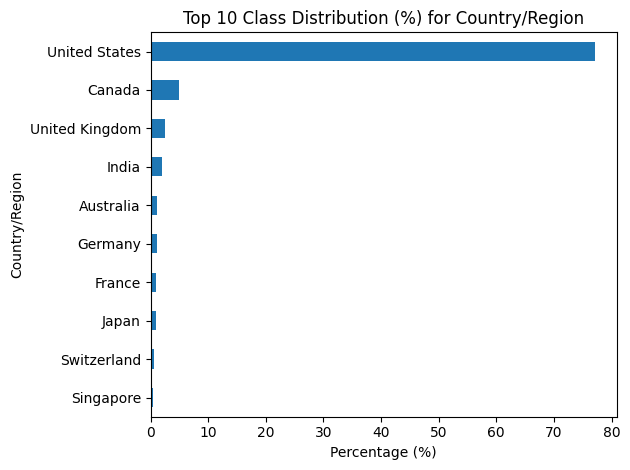


Column: Industry
Industry
Computer Software                   6.374168
Hospital & Health Care              6.274571
Insurance                           5.367720
Banking                             4.722965
Financial Services                  3.732243
Professional Training & Coaching    3.506841
Higher Education                    3.381035
Technology                          3.113697
Construction                        2.647167
Healthcare                          2.605231
Name: proportion, dtype: float64


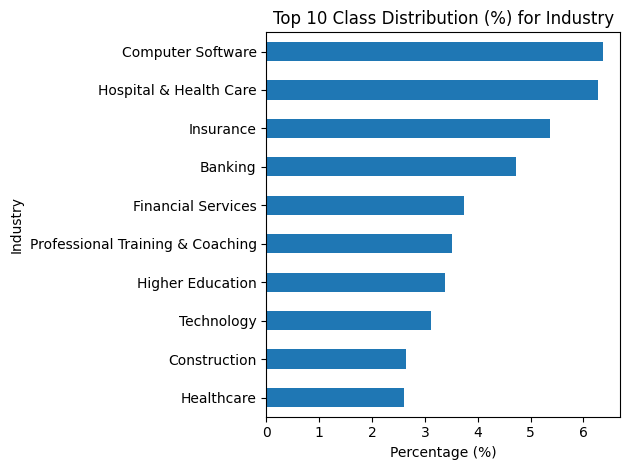


Column: Company name
Company name
Company_4305cea8    0.010075
Company_ee655b25    0.005038
Company_b76f1f65    0.005038
Company_69ad4524    0.005038
Company_88b1432e    0.005038
Company_e51ef244    0.005038
Company_7805b1f6    0.005038
Company_1d189654    0.005038
Company_6176f53c    0.005038
Company_5a9f87f8    0.005038
Name: proportion, dtype: float64


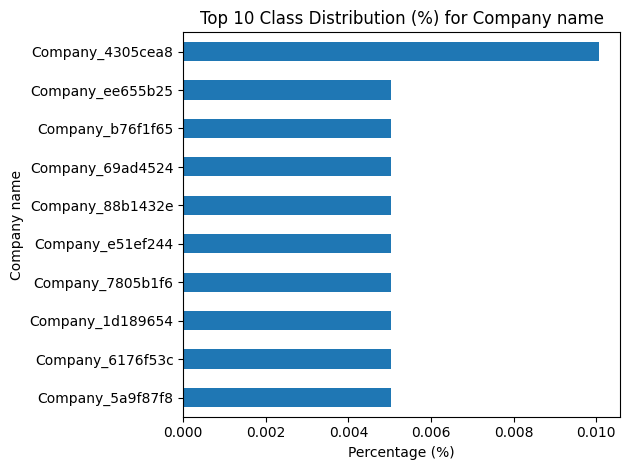

In [14]:
# Class Distribution
# Top 10 Class Distribution with Percentages for Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns

print("\nTop 10 class distribution with percentages for categorical features:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    counts_percent = df[col].value_counts(normalize=True).head(10) * 100
    print(counts_percent)

    counts_percent.iloc[::-1].plot(kind='barh', title=f"Top 10 Class Distribution (%) for {col}")
    plt.xlabel("Percentage (%)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


Top 10 + 'Other' class distribution for categorical features:

Column: Associated Contact
Associated Contact
Contact_71a916e7     0.016862
Contact_948fa4eb     0.016862
Contact_a2a88d75     0.011241
Contact_e6831e35     0.011241
Contact_7840134e     0.011241
Contact_0838dde4     0.011241
Contact_de7b1a4b     0.011241
Contact_ee33874b     0.011241
Contact_5acdeb1a     0.011241
Contact_c41f05b8     0.011241
Other               99.876349
Name: proportion, dtype: float64


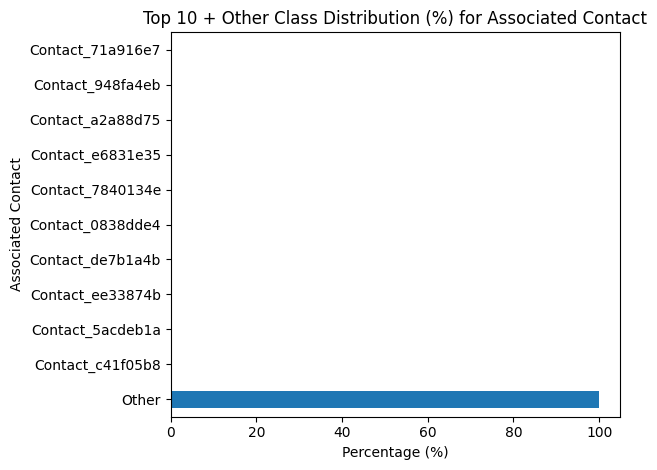


Column: Web Technologies
Web Technologies
Microsoft Exchange Online; Microsoft Office 365; Godaddy Nameserver; Outlook     0.295588
Microsoft Exchange Online; Salesforce; Microsoft Office 365; Outlook             0.268716
Microsoft Exchange Online; Microsoft Office 365; Outlook                         0.252593
Salesforce                                                                       0.220347
Google Apps                                                                      0.214973
Google Tag Manager                                                               0.171978
Google Analytics                                                                 0.166604
Microsoft Exchange Online; Outlook                                               0.161230
Microsoft Exchange Online; Salesforce; Outlook                                   0.155855
Godaddy Nameserver; Google Apps                                                  0.145107
Other                                                    

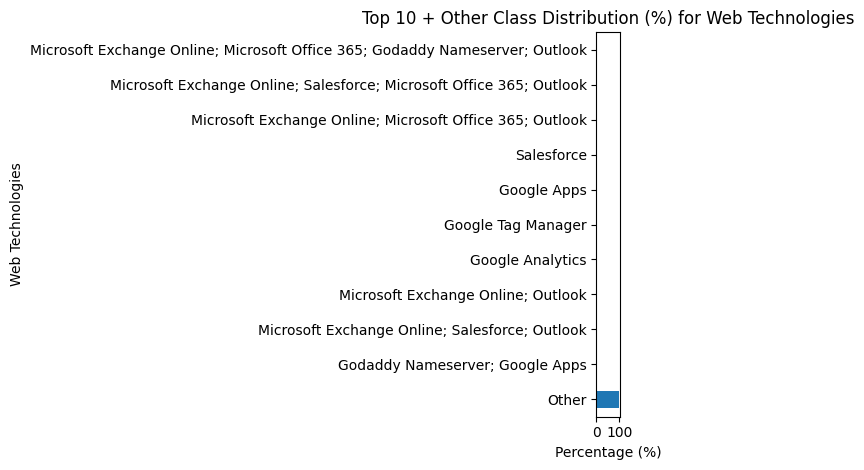


Column: Contact with Primary Company
Contact with Primary Company
Company_7cdebdc1     0.011596
Company_576068e6     0.011596
Company_98422fde     0.005798
Company_4eea30f2     0.005798
Company_2453efb3     0.005798
Company_637c32a8     0.005798
Company_2cfa7562     0.005798
Company_4375cd8e     0.005798
Company_48fdaa35     0.005798
Company_d66a8a88     0.005798
Other               99.930427
Name: proportion, dtype: float64


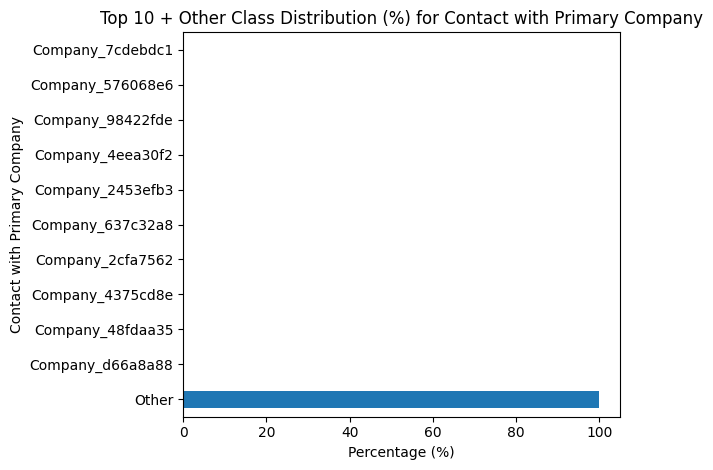


Column: ICP Fit Level
ICP Fit Level
Tier 2: Partial Fit    34.681598
Tier 3: Long Tail      34.364031
Tier 1: Ideal Fit      30.954371
Other                   0.000000
Name: proportion, dtype: float64


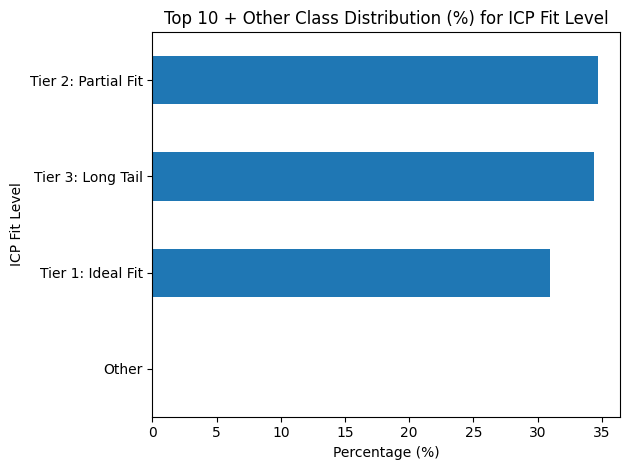


Column: Time Zone
Time Zone
America/New_York       35.205853
America/Chicago        20.222139
America/Los_Angeles    13.579324
America/Denver          3.219950
Europe/London           2.515085
America/Toronto         2.280130
Asia/Kolkata            2.146633
America/Detroit         1.724782
America/Phoenix         1.436429
Europe/Berlin           0.998558
Other                  16.671117
Name: proportion, dtype: float64


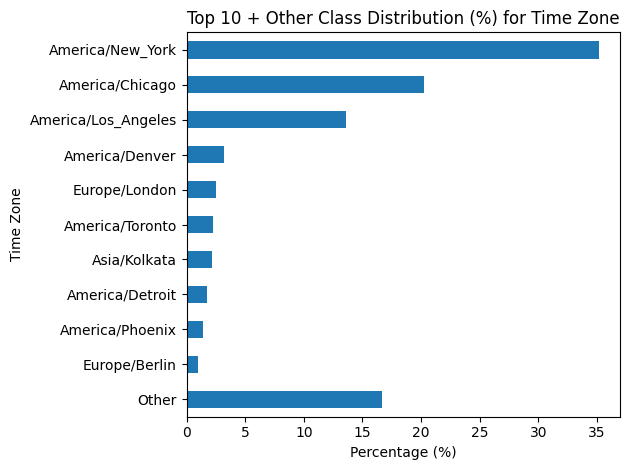


Column: Primary Industry
Primary Industry
Manufacturing                     17.089066
Business Services                 12.979725
Finance                            9.377263
Software                           8.046705
Education                          6.743302
Retail                             6.154960
Hospitals & Physicians Clinics     4.471398
Insurance                          4.353729
Transportation                     4.299421
Hospitality                        4.163650
Other                             22.320782
Name: proportion, dtype: float64


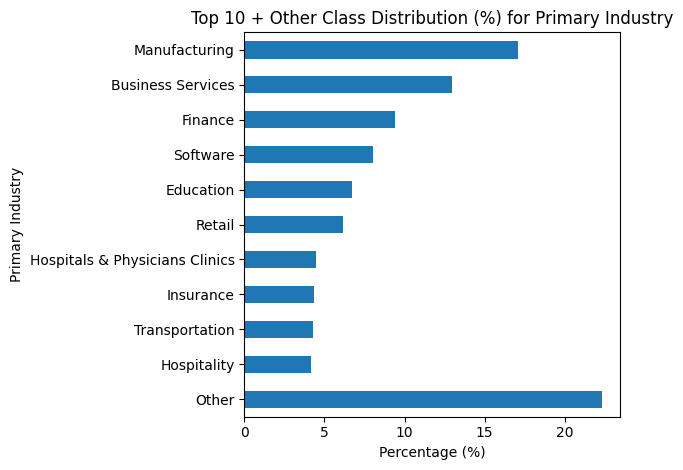


Column: State/Region
State/Region
California     6.154422
CA             4.512886
Texas          4.122554
New York       3.812426
Florida        2.924821
Illinois       2.598653
TX             2.577264
NY             2.454283
Ontario        2.427548
FL             2.358037
Other         66.057106
Name: proportion, dtype: float64


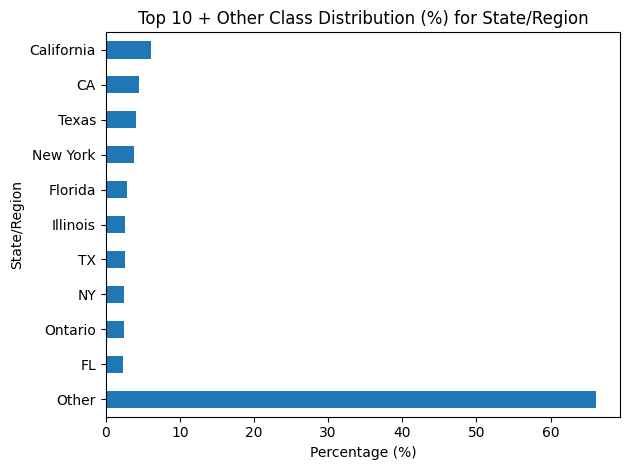


Column: Consolidated Industry
Consolidated Industry
(No value)                  10.432416
Healthcare                  10.170346
Banking                      9.686524
Technology                   9.590767
Consumer Goods               7.101099
BPO                          6.299768
Communications and Media     5.926822
Education                    5.458119
Insurance                    4.989416
Retail                       4.646709
Other                       25.698014
Name: proportion, dtype: float64


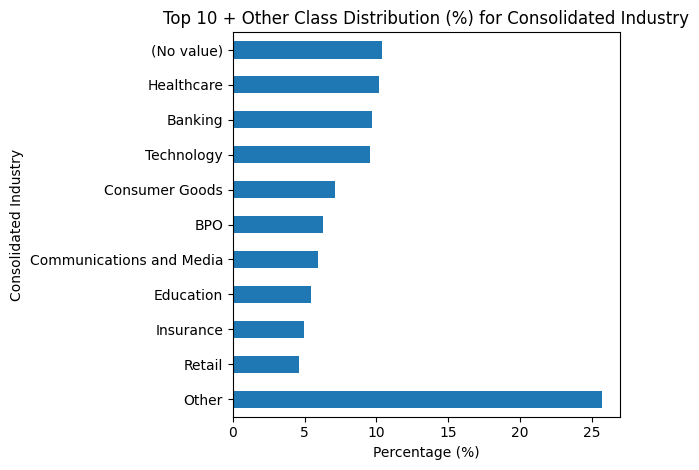


Column: Primary Sub-Industry
Primary Sub-Industry
Banking                              6.181334
Colleges & Universities              5.770725
Custom Software & IT Services        4.250361
Medical & Surgical Hospitals         3.040728
Industrial Machinery & Equipment     2.918655
Freight & Logistics Services         2.619021
Management Consulting                2.330485
Food & Beverage                      2.152924
Electricity, Oil & Gas               2.064144
Building Materials                   1.975363
Other                               66.696260
Name: proportion, dtype: float64


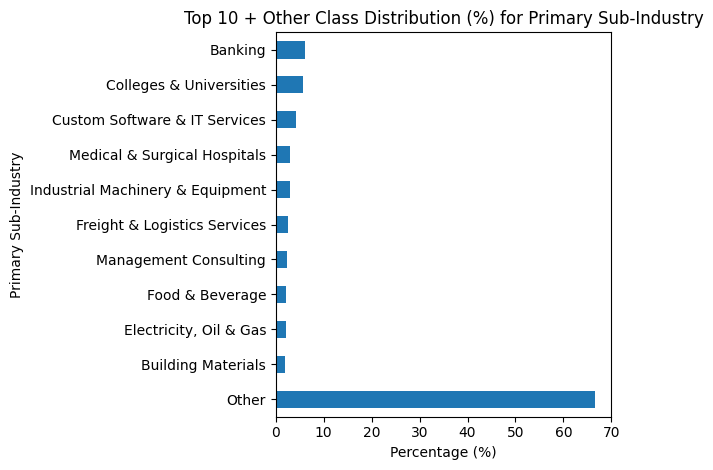


Column: Country/Region
Country/Region
United States     77.048319
Canada             4.868697
United Kingdom     2.468487
India              2.006303
Australia          1.186975
Germany            1.092437
France             0.997899
Japan              0.850840
Switzerland        0.667017
Singapore          0.456933
Other              8.356092
Name: proportion, dtype: float64


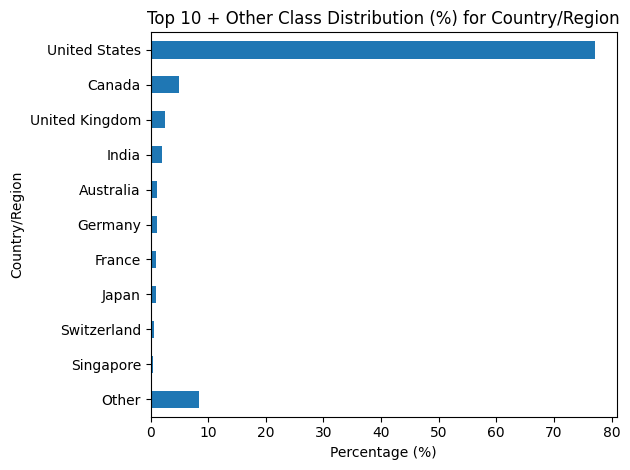


Column: Industry
Industry
Computer Software                    6.374168
Hospital & Health Care               6.274571
Insurance                            5.367720
Banking                              4.722965
Financial Services                   3.732243
Professional Training & Coaching     3.506841
Higher Education                     3.381035
Technology                           3.113697
Construction                         2.647167
Healthcare                           2.605231
Other                               58.274362
Name: proportion, dtype: float64


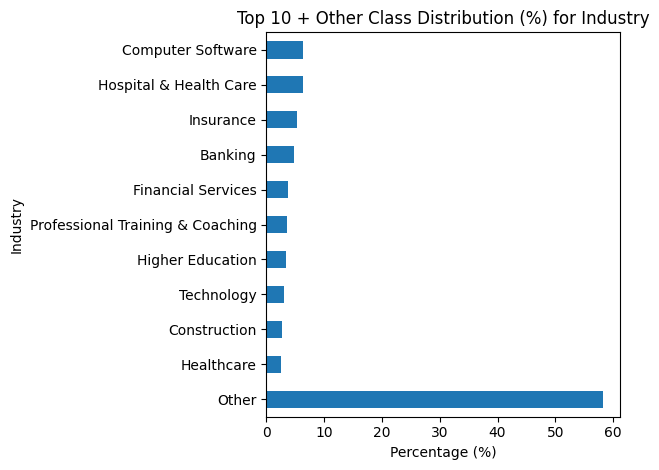


Column: Company name
Company name
Company_4305cea8     0.010075
Company_ee655b25     0.005038
Company_b76f1f65     0.005038
Company_69ad4524     0.005038
Company_88b1432e     0.005038
Company_e51ef244     0.005038
Company_7805b1f6     0.005038
Company_1d189654     0.005038
Company_6176f53c     0.005038
Company_5a9f87f8     0.005038
Other               99.944587
Name: proportion, dtype: float64


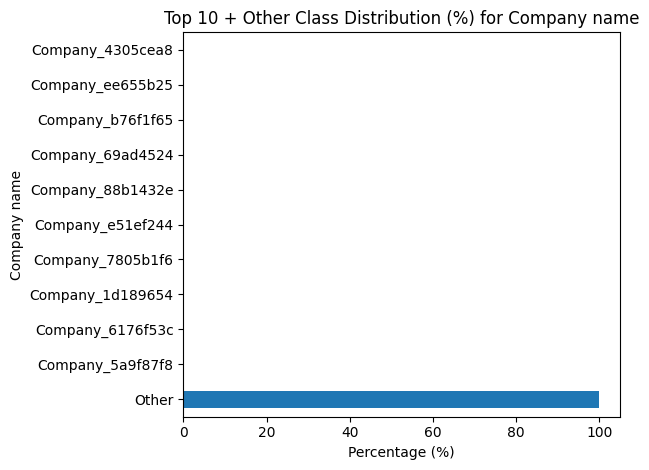

In [15]:
print("\nTop 10 + 'Other' class distribution for categorical features:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    counts_percent_all = df[col].value_counts(normalize=True) * 100

    top10 = counts_percent_all.head(10)

    other_percent = counts_percent_all.iloc[10:].sum()
    top10_with_other = top10.copy()
    top10_with_other['Other'] = other_percent

    print(top10_with_other)

    top10_with_other.iloc[::-1].plot(kind='barh', title=f"Top 10 + Other Class Distribution (%) for {col}")
    plt.xlabel("Percentage (%)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [16]:
df.drop(columns=["Number of Form Submissions"], inplace=True)
df.drop(columns=["Number of Pageviews"], inplace=True)
df.drop(columns=["Number of Sessions"], inplace=True)

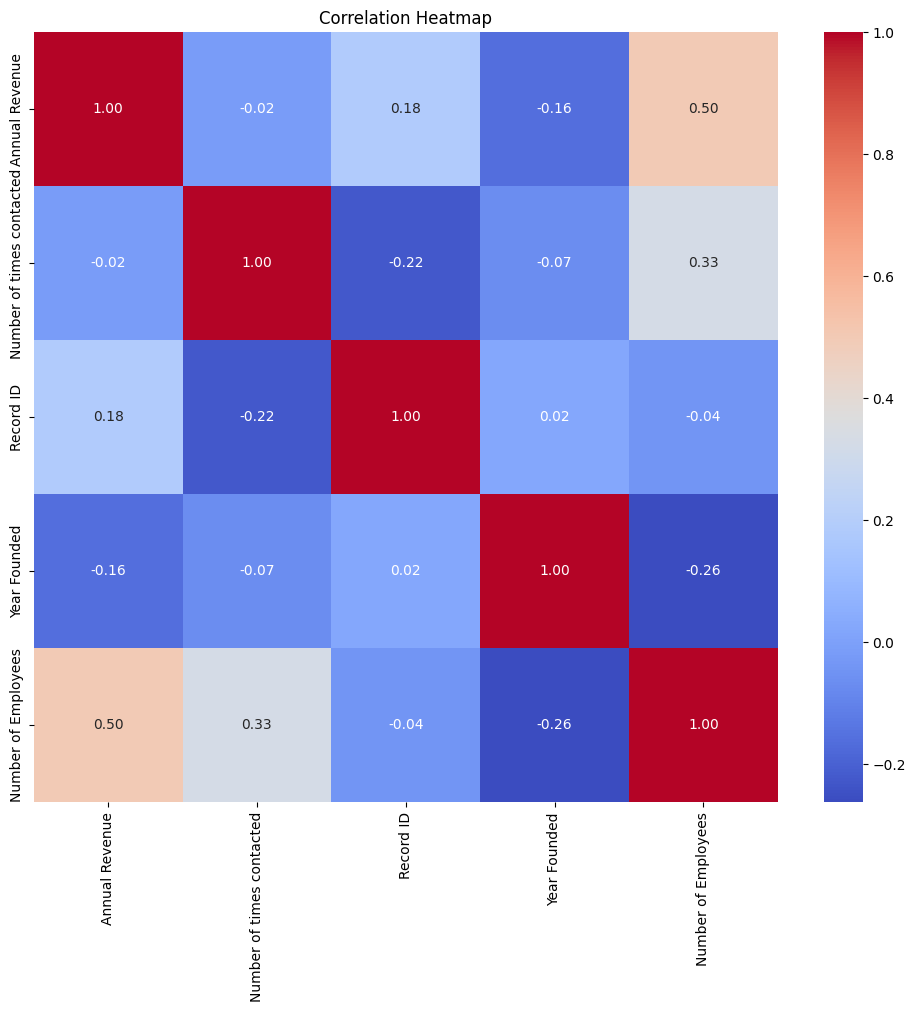

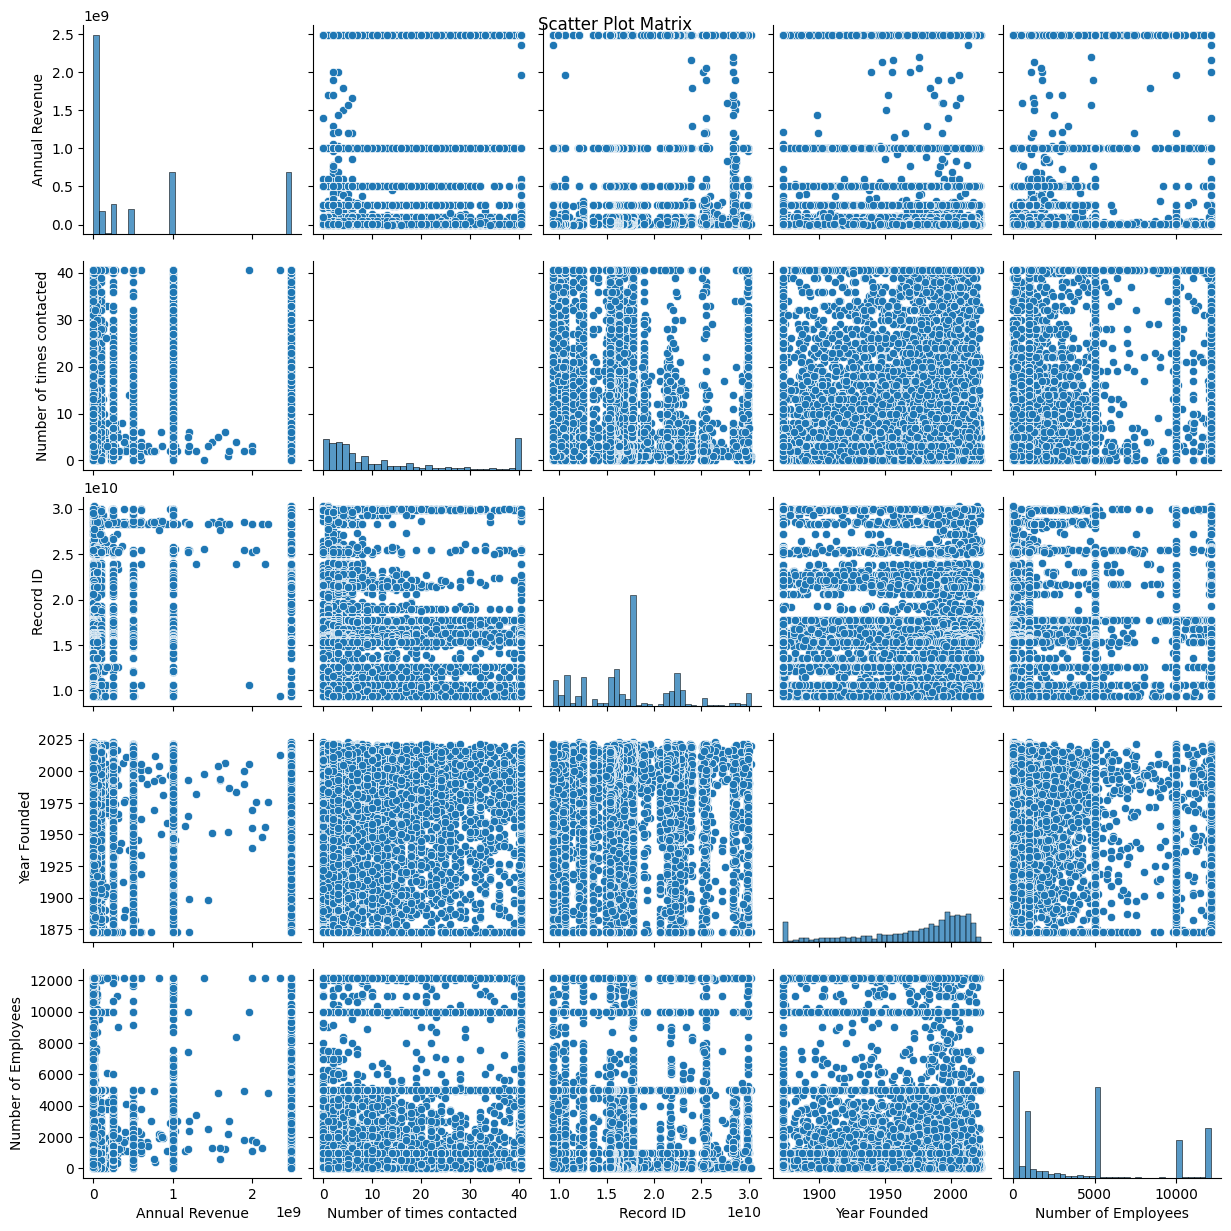

In [17]:
# Feature Correlations Analysis
numeric_cols = [col for col in numeric_cols if col in df.columns]
corr_matrix = df[numeric_cols].corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# scatter plots
sns.pairplot(df[numeric_cols])
plt.suptitle("Scatter Plot Matrix")
plt.show()